COVID-19 Cases in Canada using Time Series LSTM and ARIMA
Stephen Prudente
CIND820

Packages

In [1]:
import pandas as pd
import numpy as np
import pmdarima

Read Data, set 'case reported date' as the index, dropped empty values, create the shape of the data, and show the first 5 rows, we see that it has 17 columns & 155,292 rows

In [2]:
df = pd.read_csv (r'https://data.ontario.ca/dataset/f4f86e54-872d-43f8-8a86-3892fd3cb5e6/resource/ed270bb8-340b-41f9-a7c6-e8ef587e6d11/download/covidtesting.csv',index_col='Reported Date',parse_dates=True)
print ('Shape of data', df.shape)
df.head()

Shape of data (757, 28)


,Confirmed Negative,Presumptive Negative,Presumptive Positive,Confirmed Positive,Resolved,Deaths,Total Cases,Total patients approved for testing as of Reporting Date,Total tests completed in the last day,Percent positive tests in last day,...,Total Positive LTC Resident Cases,Total Positive LTC HCW Cases,Total LTC Resident Deaths,Total LTC HCW Deaths,Total_Lineage_B.1.1.7_Alpha,Total_Lineage_B.1.351_Beta,Total_Lineage_P.1_Gamma,Total_Lineage_B.1.617.2_Delta,deaths_data_cleaning,newly_reported_deaths
Reported Date,,,,,,,,,,,,,,,,,,,,,
2020-02-06,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-07,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-08,NaN,NaN,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-09,NaN,NaN,0.0,2.0,NaN,NaN,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-10,NaN,NaN,0.0,2.0,NaN,NaN,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Checking the Nulls

In [ ]:
df.isnull()

Sum of Nulls

In [ ]:
df.isnull().sum()

Replacing Nulls with the mean

In [13]:
df.fillna(df.mean(), inplace=True)

Checking for nulls again to make sure they've been replaced

In [14]:
df.isnull().sum()

Confirmed Negative                                           0
Presumptive Negative                                         0
Presumptive Positive                                         0
Confirmed Positive                                           0
Resolved                                                     0
Deaths                                                       0
Total Cases                                                  0
Total patients approved for testing as of Reporting Date     0
Total tests completed in the last day                        0
Percent positive tests in last day                           0
Under Investigation                                          0
Number of patients hospitalized with COVID-19                0
Number of patients in ICU due to COVID-19                    0
Number of patients in ICU, testing positive for COVID-19     0
Number of patients in ICU, testing negative for COVID-19     0
Number of patients in ICU on a ventilator due to COVID-

Descriptive Statistics

In [15]:
df.describe()

,Confirmed Negative,Presumptive Negative,Presumptive Positive,Confirmed Positive,Resolved,Deaths,Total Cases,Total patients approved for testing as of Reporting Date,Total tests completed in the last day,Percent positive tests in last day,...,Total Positive LTC Resident Cases,Total Positive LTC HCW Cases,Total LTC Resident Deaths,Total LTC HCW Deaths,Total_Lineage_B.1.1.7_Alpha,Total_Lineage_B.1.351_Beta,Total_Lineage_P.1_Gamma,Total_Lineage_B.1.617.2_Delta,deaths_data_cleaning,newly_reported_deaths
count,757.000000,757.000000,757.0000,757.000000,7.570000e+02,757.000000,7.570000e+02,7.570000e+02,757.000000,757.000000,...,757.000000,757.000000,757.000000,757.000000,757.000000,757.000000,757.000000,757.000000,757.00000,757.000000
mean,7022.148936,22.083333,0.2800,13851.442384,3.223132e+05,6344.529986,3.379208e+05,1.041408e+07,33502.389535,4.734357,...,12773.536098,5757.341577,3238.825688,9.064220,96758.048951,908.819149,3219.944444,11367.216216,0.43750,16.204545
std,2527.532817,3.632401,0.0965,21926.145288,2.909875e+05,3419.449552,3.069900e+05,7.656082e+06,14711.628153,5.191000,...,4697.015581,2242.008027,939.028945,1.334971,38304.141156,390.040887,1328.517676,3425.987400,0.74652,9.526948
min,90.000000,0.000000,0.0000,0.000000,1.000000e+00,1.000000,1.000000e+00,1.390000e+02,5813.000000,0.400000,...,4235.000000,1456.000000,1115.000000,3.000000,51.000000,1.000000,1.000000,497.000000,-4.00000,0.000000
25%,7022.148936,22.083333,0.2800,2409.000000,3.774800e+04,2832.000000,4.056500e+04,2.656928e+06,23105.000000,1.700000,...,8118.000000,3248.000000,2234.000000,8.000000,96758.048951,908.819149,3219.944444,11367.216216,0.43750,16.204545
50%,7022.148936,22.083333,0.2800,5601.000000,2.852620e+05,6773.000000,2.919990e+05,1.052341e+07,31569.000000,3.300000,...,14916.000000,6515.000000,3820.000000,10.000000,96758.048951,908.819149,3219.944444,11367.216216,0.43750,16.204545
75%,7022.148936,22.083333,0.2800,16563.000000,5.471980e+05,9472.000000,5.619750e+05,1.710890e+07,40692.000000,5.100000,...,15459.000000,7285.000000,3985.000000,10.000000,96758.048951,908.819149,3219.944444,11367.216216,0.43750,16.204545
max,40630.000000,81.000000,2.0000,140523.000000,1.077985e+06,12497.000000,1.107408e+06,2.315758e+07,76472.000000,34.300000,...,24723.000000,11450.000000,4485.000000,10.000000,146513.000000,1503.000000,5231.000000,22753.000000,7.00000,89.000000


Plot the data: Enter variable below to view a quick graph

<AxesSubplot:xlabel='Reported Date'>

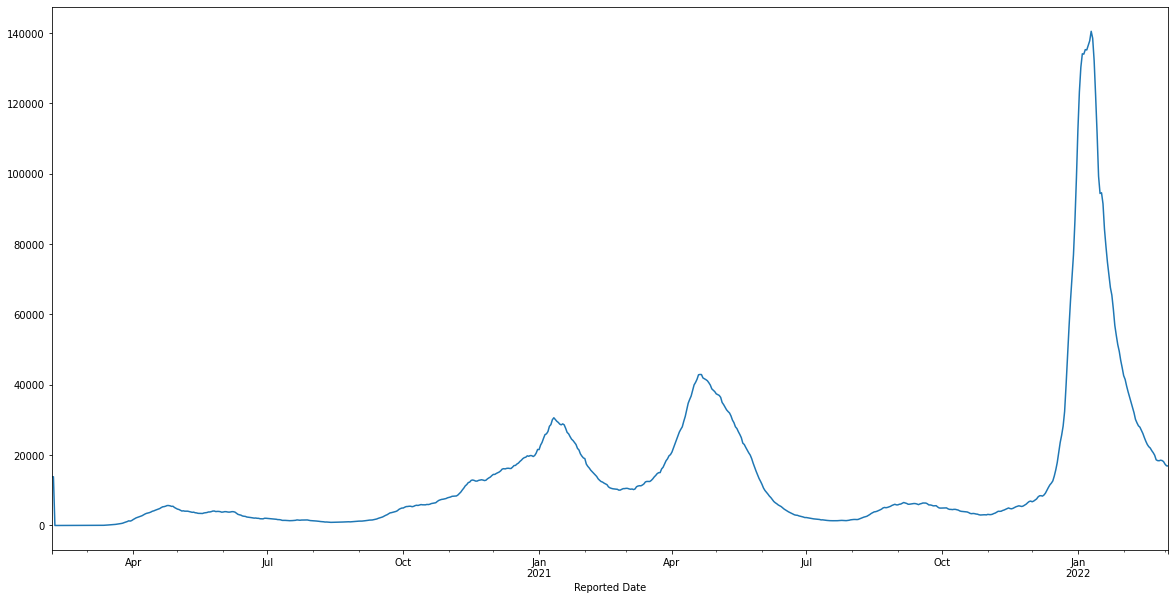

In [16]:
df['Confirmed Positive'].plot(figsize=(20,10))

In [17]:
from statsmodels.tsa.stattools import adfuller

def ad_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression and Critical Value Calculation :",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)

Enter variable below that will be forecasted

In [18]:
ad_test(df['Confirmed Positive'])

1. ADF :  -3.887489869455715
2. P-Value :  0.002128868319006638
3. Num Of Lags :  20
4. Num Of Observations Used For ADF Regression and Critical Value Calculation : 736
5. Critical Values :
	 1% :  -3.4392661055744767
	 5% :  -2.86547495466493
	 10% :  -2.56886540295664


Figure Out Order for ARIMA Model

In [19]:
from pmdarima import auto_arima
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

Enter the variable in the ' ' below that will be forecasted

In [20]:
stepwise_fit = auto_arima(df['Confirmed Positive'], trace=True,
                          suppress_warnings=True)

stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.76 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=13322.534, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=12519.291, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=12778.191, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=13320.540, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=12519.661, Time=0.20 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=12518.643, Time=0.22 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.49 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=12499.173, Time=0.34 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=12613.732, Time=0.19 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=12498.237, Time=0.48 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=12593.815, Time=0.31 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.71 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=12493.060, Time=0.54 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   :

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  757
Model:               SARIMAX(1, 1, 4)   Log Likelihood               -6239.731
Date:                Thu, 03 Mar 2022   AIC                          12491.461
Time:                        22:37:37   BIC                          12519.229
Sample:                             0   HQIC                         12502.157
                                - 757                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8871      0.012     72.225      0.000       0.863       0.911
ma.L1         -0.0621      0.016     -3.845      0.000      -0.094      -0.030
ma.L2         -0.3210      0.013    -24.222      0.000      -0.347      -0.295
ma.L3         -0.1528      0.016     -9.434      0.000      -0.185      -0.121
ma.L4          0.1793      0.016     11.545      0.000       0.149       0.210
sigma2      8.516e+05   9448.447     90.128      0.000    8.33e+05     8.7e+05
===================================================================================
Ljung-Box (L1) (Q):                   1.71   Jarque-Bera (JB):            142896.30
Prob(Q):                              0.19   Prob(JB):                         0.00
Heteroskedasticity (H):               0.93   Skew:                            -2.56
Prob(H) (two-sided):                  0.59   Kurtosis:                        70.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [21]:
from statsmodels.tsa.arima_model import ARIMA

Split Data into Training and Testing

In [22]:
print(df.shape)
train=df.iloc[:-30]
test=df.iloc[-30:]
print(train.shape,test.shape)

(757, 28)
(727, 28) (30, 28)


Train the Model

In [23]:
model=ARIMA(train['Confirmed Positive'],order=(1,1,4))
model=model.fit()
model.summary()

NotImplementedError: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been removed in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and statsmodels.tsa.SARIMAX.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained. It also offers alternative specialized
parameter estimators.


Make Predictions on Test Set

In [24]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels')
print(pred)
#pred.index=df.index[start:end+1]
#print(pred)

NameError: name 'model' is not defined

In [ ]:
pred.plot(legend=True)
test[''].plot(legend=True)

In [ ]:
test[''].mean()

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,test['']))
print(rmse)

In [ ]:
model2=ARIMA(df['Confirmed Positive'],order=(1,0,5))
model2=model2.fit()
df.tail()

For Future Dates

In [ ]:
index_future_dates=pd.date_range(starts='',end='')
#print(index_future_dates)
pred=model2.predict(start=len(df),end=len(df)+30,typ='levels').rename('ARIMA Predictions')
#print(comp_pred)
pred.index=index_future_dates
#print(comp_pred)

In [ ]:
pred.plot(figsize=(12,5),legend=True)